In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Anna\Desktop\facebook_ads_data (2.0).csv")
df['ad_date'] = pd.to_datetime(df['ad_date'])
df['ad_month'] = df['ad_date'].dt.to_period('M').dt.start_time
df


,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi,ad_month
0,2022-11-05,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN,2022-11-01
1,2022-11-01,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN,2022-11-01
2,2022-10-31,Expansion,227.45,6054,58,191.87,3.92,37.57,0.009580,0.843570,2022-10-01
3,2022-10-30,Expansion,335.91,27562,69,472.61,4.87,12.19,0.002503,1.406954,2022-10-01
4,2022-10-29,Expansion,714.03,33358,115,680.34,6.21,21.41,0.003447,0.952817,2022-10-01
...,...,...,...,...,...,...,...,...,...,...,...
1489,2020-11-15,Discounts,6.98,12465,657,10.96,0.01,0.56,0.052708,1.570201,2020-11-01
1490,2020-11-14,Discounts,7.27,5005,392,12.67,0.02,1.45,0.078322,1.742779,2020-11-01
1491,2020-11-13,Discounts,6.36,11669,451,9.77,0.01,0.55,0.038649,1.536164,2020-11-01
1492,2020-11-12,Discounts,23.00,10473,397,21.13,0.06,2.20,0.037907,0.918696,2020-11-01


In [3]:
group_month = df.groupby('ad_month').agg({'total_spend': 'sum', 'total_value': 'sum'}).astype('int').reset_index()
group_month

,ad_month,total_spend,total_value
0,2020-11-01,390,458
1,2020-12-01,792,1012
2,2021-01-01,1257,1524
3,2021-02-01,575,723
4,2021-03-01,54,66
5,2021-04-01,1389,1815
6,2021-05-01,10320,14151
7,2021-06-01,12195,16033
8,2021-07-01,20722,25774
9,2021-08-01,18925,24171


<Axes: title={'center': 'Daily total spend in 2021'}, xlabel='ad_date'>

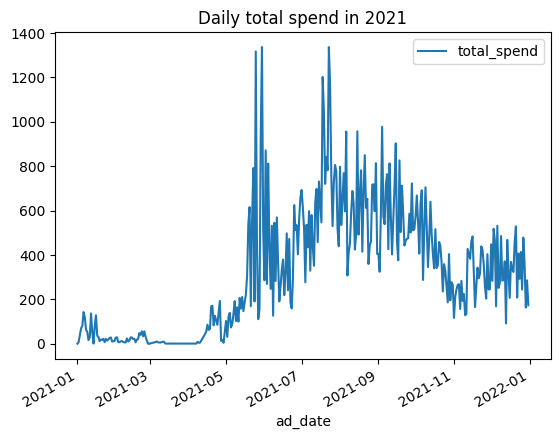

In [4]:
df_2021 = df[df["ad_date"].dt.year == 2021]
group_day_2021 = df_2021.groupby("ad_date", as_index=False)["total_spend"].sum()
group_day_2021.plot(x="ad_date", y="total_spend", kind="line", title="Daily total spend in 2021")

<Axes: title={'center': 'Daily romi in 2021, 7 days average'}, xlabel='ad_date'>

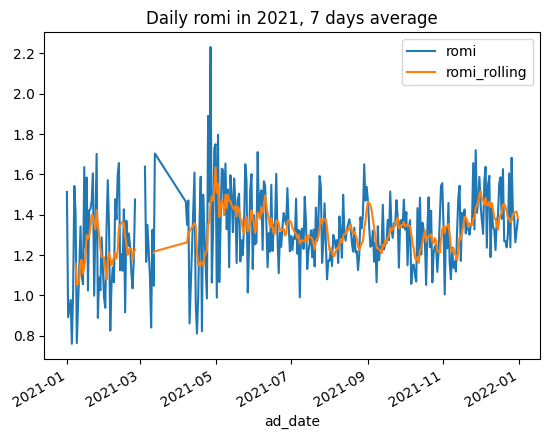

In [5]:
df_2021 = df[df["ad_date"].dt.year == 2021]
group_day_2021 = df_2021.groupby("ad_date", as_index=False)["romi"].mean()
group_day_2021["romi_rolling"] = group_day_2021["romi"].rolling(window=7).mean()
group_day_2021.plot(x="ad_date", y=["romi", "romi_rolling"], kind="line", title="Daily romi in 2021, 7 days average")

<Axes: title={'center': 'Total spend on ads by campaign'}, xlabel='campaign_name'>

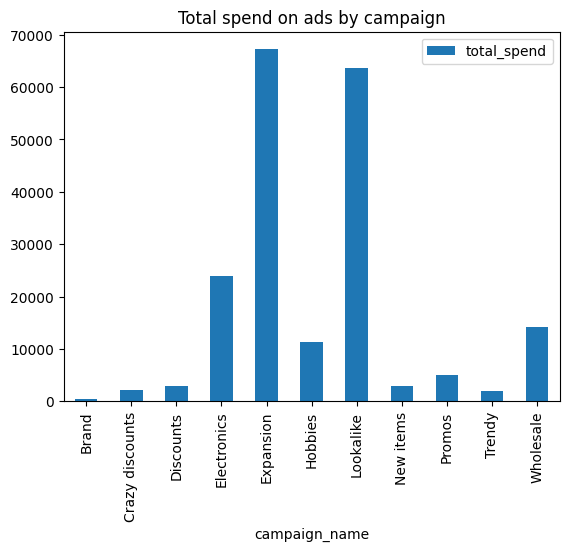

In [6]:
group_campaign = df.groupby("campaign_name", as_index=False)["total_spend"].sum()
group_campaign.plot(x="campaign_name", y="total_spend", kind="bar", title="Total spend on ads by campaign")

<Axes: title={'center': 'Average romi per campaign'}, xlabel='campaign_name'>

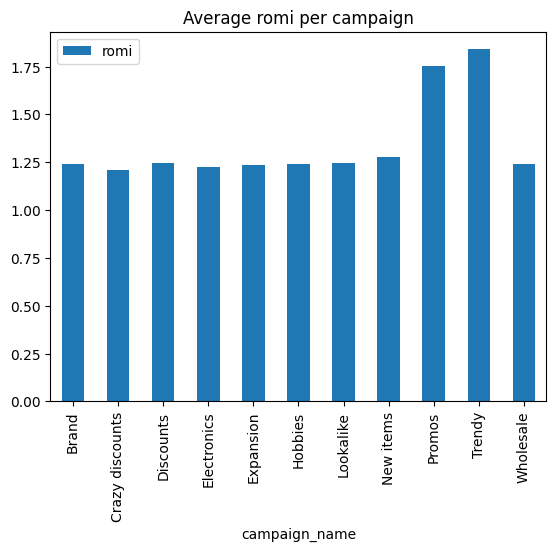

In [7]:
group_campaign_romi = df.groupby("campaign_name", as_index=False)["romi"].mean()
group_campaign_romi.plot(x="campaign_name", y="romi", kind="bar", title="Average romi per campaign")

<Figure size 2000x600 with 0 Axes>

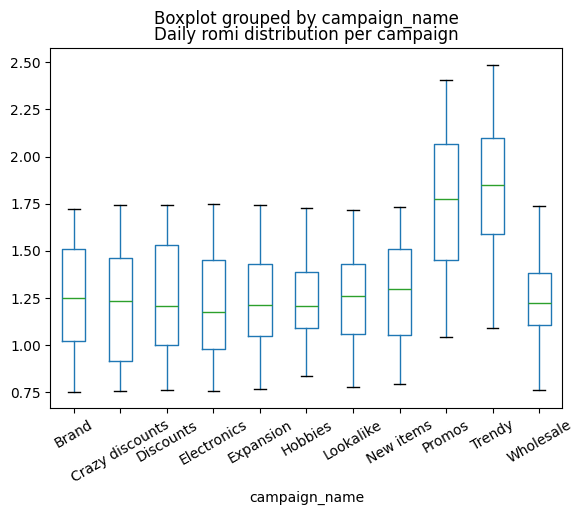

In [8]:
plt.figure(figsize=(20, 6))
df.boxplot(column="romi", by="campaign_name", grid=False)
plt.title("Daily romi distribution per campaign")
plt.xticks(rotation=30)
plt.show()

<Axes: title={'center': 'Romi distribution'}, ylabel='Frequency'>

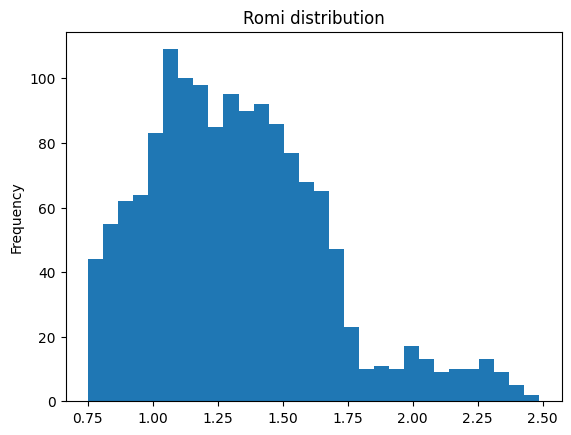

In [9]:
df['romi'].plot(kind='hist', bins=30, title='Romi distribution')


<Axes: >

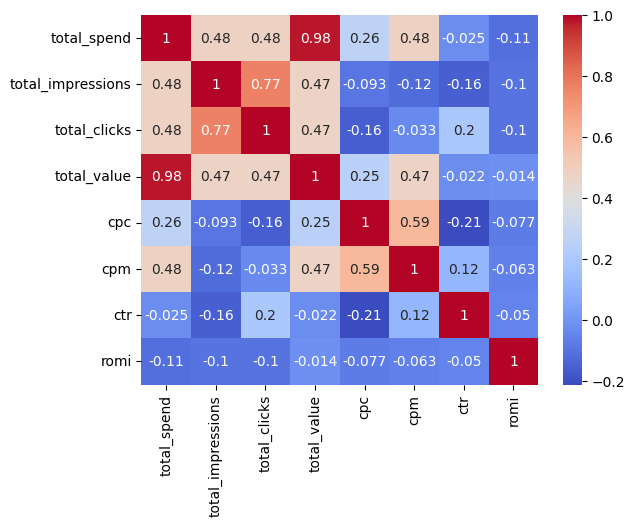

In [12]:
sns.heatmap(df.select_dtypes(include='number').corr(), cmap='coolwarm', annot=True)

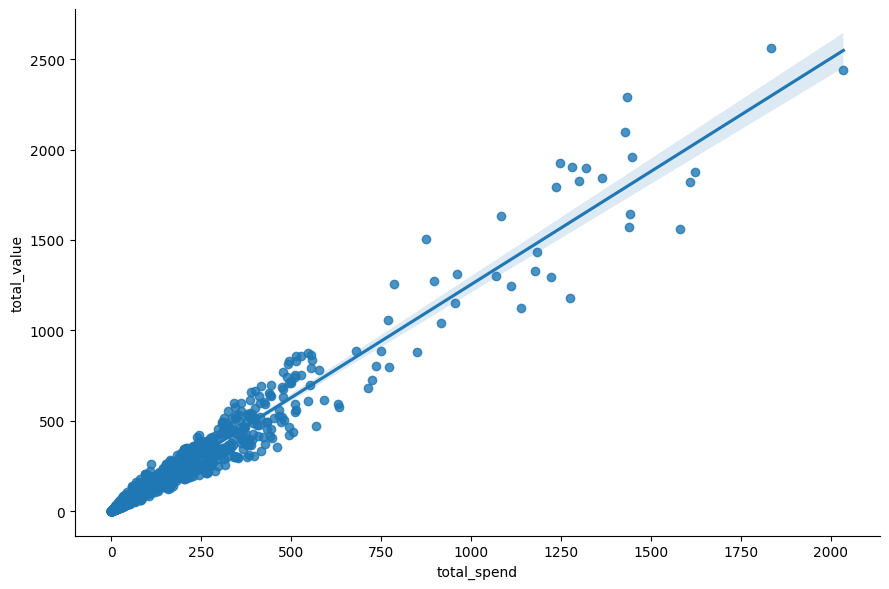

In [11]:
sns.lmplot(x='total_spend', y='total_value', data=df, height=6, aspect=1.5)